In [38]:
from neural_priors.utils.data import get_all_subject_ids, Subject, get_all_behavioral_data
import pandas as pd
from tqdm import tqdm
from tqdm.contrib.itertools import product

In [39]:



results = []
keys = []

for subject_id, range_n in product(get_all_subject_ids(), ['narrow', 'wide']):
    try:
        sub = Subject(subject_id)
        pars_wprf = sub.get_prf_parameters_volume(None, smoothed=False, wprf=True, cross_validated=False, roi='NPCr', range_n=range_n)

        results.append(pars_wprf)
        keys.append((subject_id, 'wprf', range_n))

        pars_prf = sub.get_prf_parameters_volume(None, smoothed=False, wprf=False, cross_validated=False, roi='NPCr', range_n=range_n)
        results.append(pars_prf[['cvr2']])
        keys.append((subject_id, 'prf', range_n))
    except Exception as e:
        print(f'Error with {subject_id}: {e}')

results = pd.concat(results, keys=keys, names=['subject', 'model', 'range'], axis=1)

  0%|          | 0/62 [00:00<?, ?it/s]

Error with 10: File not found: '/data/ds-neuralpriors/derivatives/encoding_model.cv.denoise.wprf.range_wide/sub-10/func/sub-10_desc-cvr2.optim_space-T1w_pars.nii.gz'
Error with 12: File not found: '/data/ds-neuralpriors/derivatives/encoding_model.cv.denoise.wprf.range_narrow/sub-12/func/sub-12_desc-cvr2.optim_space-T1w_pars.nii.gz'
Error with 12: File not found: '/data/ds-neuralpriors/derivatives/encoding_model.cv.denoise.wprf.range_wide/sub-12/func/sub-12_desc-cvr2.optim_space-T1w_pars.nii.gz'
Error with 13: File not found: '/data/ds-neuralpriors/derivatives/encoding_model.cv.denoise.wprf.range_narrow/sub-13/func/sub-13_desc-cvr2.optim_space-T1w_pars.nii.gz'
Error with 13: File not found: '/data/ds-neuralpriors/derivatives/encoding_model.cv.denoise.wprf.range_wide/sub-13/func/sub-13_desc-cvr2.optim_space-T1w_pars.nii.gz'
Error with 14: File not found: '/data/ds-neuralpriors/derivatives/encoding_model.cv.denoise.wprf.range_narrow/sub-14/func/sub-14_desc-cvr2.optim_space-T1w_pars.nii.gz

In [40]:
tmp = results.stack('subject')


tmp = tmp[(tmp > 0.0).any(axis=1)]

(tmp['wprf'] < tmp['prf']).mean()

range   parameter
narrow  cvr2         0.350801
wide    cvr2         0.432182
dtype: float64

In [41]:
tmp

model            wprf       prf      wprf       prf
range          narrow    narrow      wide      wide
parameter        cvr2      cvr2      cvr2      cvr2
    subject                                        
0   08      -0.039580 -0.073602 -0.034785  0.012760
2   05       0.001665 -0.004926 -0.034265 -0.055010
3   03       0.002893  0.000973 -0.047710 -0.069523
    08      -0.032464 -0.052839 -0.055253  0.026423
    09       0.012368  0.001930 -0.029129 -0.085448
...               ...       ...       ...       ...
872 07       0.015306  0.018243 -0.062828 -0.082775
874 07       0.023969  0.007427  0.002050 -0.008718
875 07       0.013766 -0.005647 -0.025992 -0.025853
879 07      -0.043169  0.015758 -0.055461 -0.076851
889 07       0.063107  0.058679  0.007009 -0.018913

[1622 rows x 4 columns]

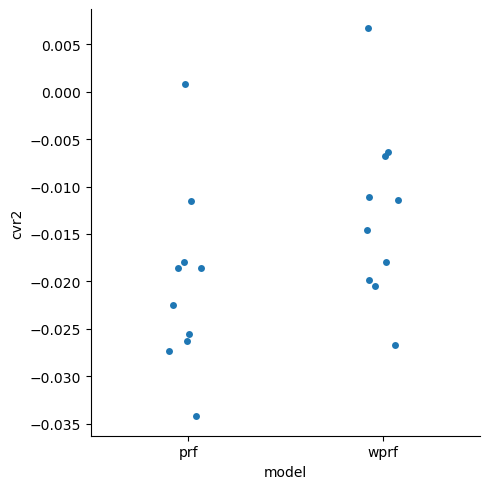

In [42]:
import seaborn as sns
sns.catplot(x='model', y='cvr2', data=tmp.stack([0,1]).groupby(['subject', 'model']).mean().reset_index())

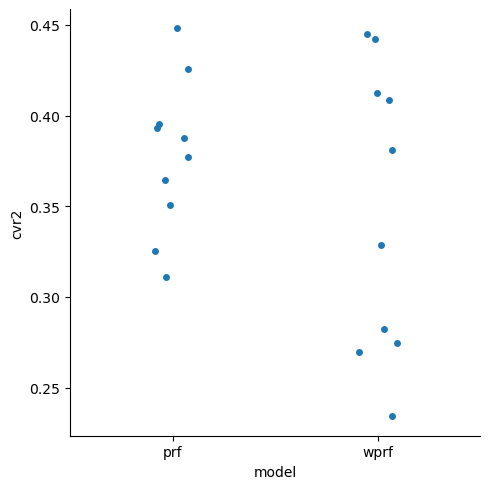

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x='model', y='cvr2', data=(tmp > 0.0).stack([0,1]).groupby(['subject', 'model']).mean().reset_index())

# plt.axhline(0.5, c='k', ls='--')

In [48]:
tmp.groupby(['subject']).corr().groupby(['model', 'range']).mean()

model             wprf       prf      wprf       prf
range           narrow    narrow      wide      wide
parameter         cvr2      cvr2      cvr2      cvr2
model range                                         
prf   narrow  0.577243  1.000000 -0.222813 -0.304169
      wide   -0.271339 -0.304169  0.482457  1.000000
wprf  narrow  1.000000  0.577243 -0.151068 -0.271339
      wide   -0.151068 -0.222813  1.000000  0.482457